# Pymaceuticals Inc.
---

### Analysis

- Thought 1: Infubinol and Ceftamin are less effective based on tumor volume size than Capomulin and Ramicane.
  
- Thought 2: Per the data, the larger the mouse, the larger the tumor would be by volume.

- Thought 3: Capomulin seemed to be the most successful drug in the trial over the others.

 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as sc
import seaborn as sns
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

df.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [3]:
# Checking the number of mice.

df["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values()

Mouse ID  Timepoint
a203      0            1
q633      5            1
          0            1
q610      35           1
          30           1
                      ..
g989      20           2
          5            2
          10           2
          0            2
          15           2
Length: 1888, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [7]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

average_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
average_tumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen Size'}, xlabel='Drug Regimen', ylabel='Count'>

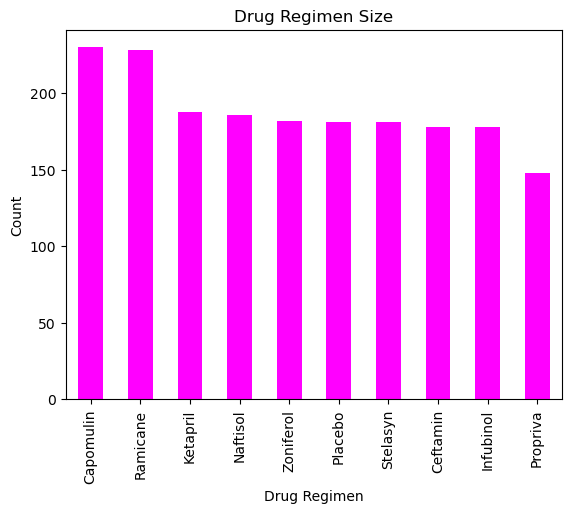

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df2.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar", title="Drug Regimen Size", ylabel="Count", color="magenta")

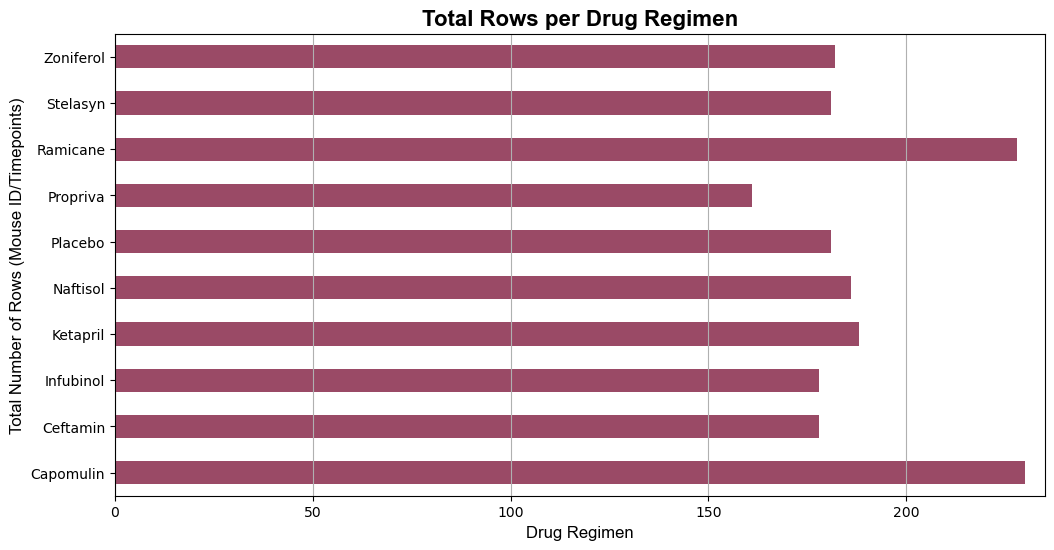

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Data Viz Recipe

drug_regimen_counts = df.groupby('Drug Regimen').size()

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
drug_regimen_counts.plot(kind='barh', color="#9A4A66")

# Customizations
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Total Number of Rows (Mouse ID/Timepoints)", fontfamily="Arial", fontsize=12)
plt.title("Total Rows per Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set Y Limits (adjust as necessary based on your data)
plt.xlim(0, drug_regimen_counts.max() + 5)

# Add in a background grid
plt.grid(axis='x')

# Show the Graph
plt.show()


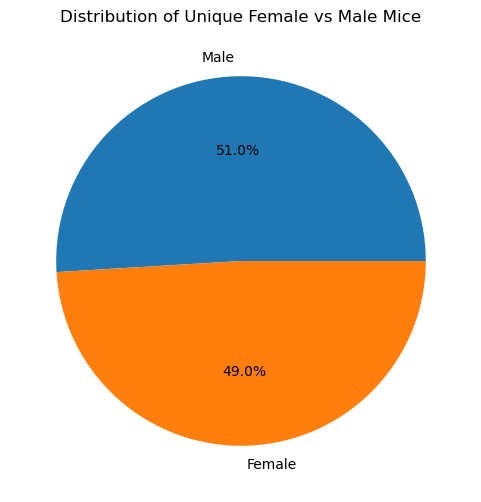

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Count the unique mice by gender
gender_counts = df2["Sex"].value_counts()

# Create a pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='', title='Distribution of Unique Female vs Male Mice', figsize=(6, 6))

# Show the pie chart
plt.show()

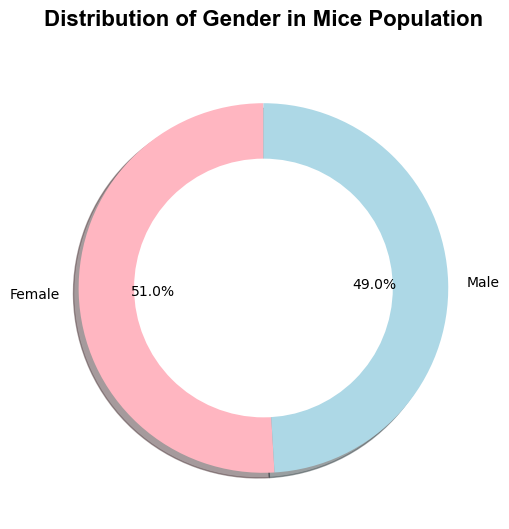

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

gender_counts = df2['Sex'].value_counts()

# Data Viz Recipe
labels = ['Female', 'Male']
sizes = [gender_counts.get('Female', 0), gender_counts.get('Male', 0)]
colors = ['lightpink', 'lightblue']

# Set the explode levels for each slice
explode = (0, 0)

# Change Canvas Size
plt.figure(figsize=(6, 6))

# Create a basic plot
plt.pie(gender_counts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# DONUT
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.title("Distribution of Gender in Mice Population\n", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.show()


## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
longest_time = df2.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df7 = pd.merge(longest_time, df2, on=["Mouse ID", "Timepoint"], how="inner")

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = df7["Drug Regimen"].isin(drugs)
df8 = df7.loc[mask].reset_index(drop=True)
df8

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


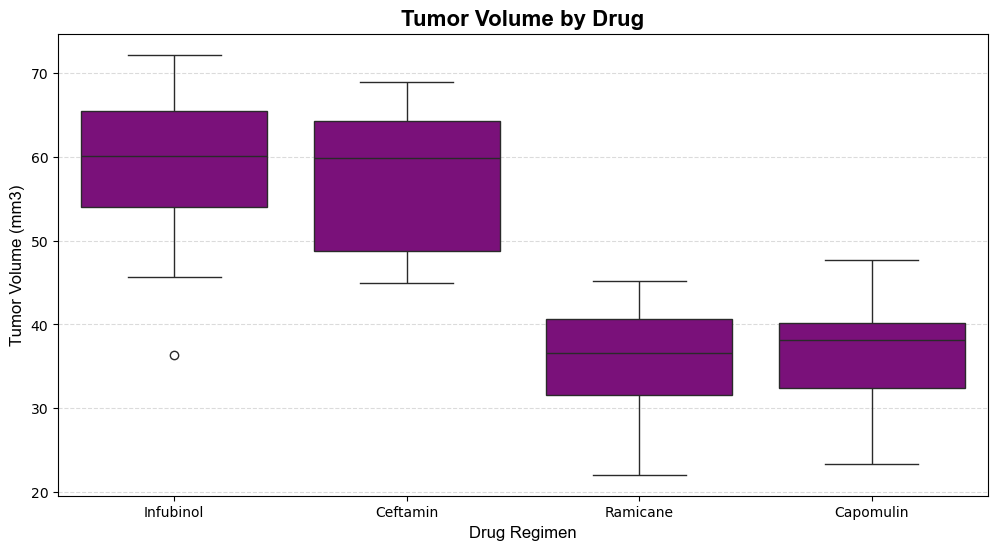

In [70]:
# Change Canvas Size
plt.figure(figsize=(12,6))

# Create Box Plot
sns.boxplot(data=df8, y="Tumor Volume (mm3)", x="Drug Regimen", color="darkmagenta")

# Customizatons

# Change Colors
# Reference Lines
# Labels/Titles
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Drug", fontweight="bold", fontsize=16, fontfamily="Arial")

# Background Grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.8)

# Show the Plot
plt.show()

In [76]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = df8['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Iterate through treatment
for treatment in treatments:
    # Locate the rows that contain mice on each drug and get the tumor volumes
    treatment_data = df8.loc[df8['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # add subset
    tumor_volumes.append(treatment_data)

    # Calculate IQR
    q1 = np.percentile(treatment_data, 25)
    q3 = np.percentile(treatment_data, 75)
    iqr = q3 - q1

    # Determine outliers using upper and lower bounds
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)

    # find outliers
    outliers = treatment_data[(treatment_data < lower) | (treatment_data > upper)]
    print(f"Outliers for {treatment}: {outliers.tolist()}")

Outliers for Infubinol: [36.3213458]
Outliers for Ceftamin: []
Outliers for Ramicane: []
Outliers for Capomulin: []


In [77]:
tumor_volumes

[0     67.973419
 1     65.525743
 6     57.031862
 8     66.083066
 14    72.226731
 15    36.321346
 18    60.969711
 20    62.435404
 22    60.918767
 31    67.289621
 41    66.196912
 42    62.117279
 52    47.010364
 55    60.165180
 57    55.629428
 58    45.699331
 60    54.656549
 69    55.650681
 79    46.250112
 80    54.048608
 81    51.542431
 85    50.005138
 86    58.268442
 93    67.685569
 99    62.754451
 Name: Tumor Volume (mm3), dtype: float64,
 2     62.999356
 10    45.000000
 11    56.057749
 13    55.742829
 23    48.722078
 28    47.784682
 36    61.849023
 39    68.923185
 43    67.748662
 44    57.918381
 46    46.784535
 47    59.851956
 48    64.299830
 56    59.741901
 59    61.433892
 61    64.192341
 74    45.000000
 75    52.925348
 76    45.000000
 84    67.527482
 89    45.000000
 91    64.634949
 92    61.386660
 95    68.594745
 97    64.729837
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978

C:\Users\Chase\AppData\Local\Temp\ipykernel_21152\1601102665.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=treatments)


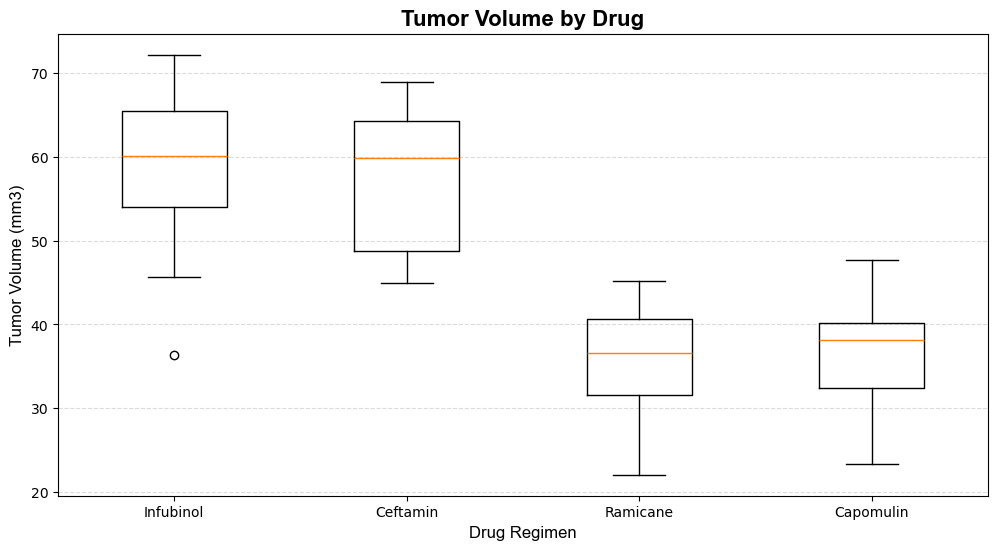

In [78]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Change Canvas Size
plt.figure(figsize=(12,6))

# Create Box Plot
plt.boxplot(tumor_volumes, labels=treatments)

# Customizatons

# Change Colors
# Reference Lines
# Labels/Titles
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Drug", fontweight="bold", fontsize=16, fontfamily="Arial")

# Background Grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.8)

# Show the Plot
plt.show()

## Line and Scatter Plots

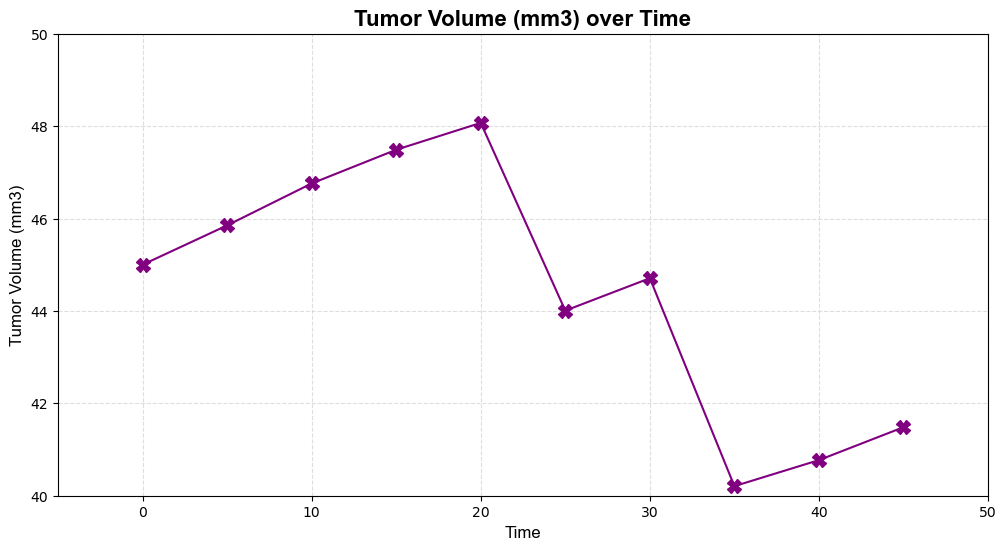

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "l509"

df4 = df2.loc[df2["Mouse ID"] == mouse]

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Data Viz Recipe

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(df4["Timepoint"], df4["Tumor Volume (mm3)"], color="purple", marker="X",markersize=10)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Time", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume (mm3) over Time", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.ylim(40, 50)
plt.xlim(-5, 50)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Add in a legend

# Show/Save the Graph
plt.show()

## Correlation and Regression

In [38]:
regimen = "Capomulin"

df5 = df2.loc[df2["Drug Regimen"] == regimen]
df6 = df5.loc[:, ["Tumor Volume (mm3)", "Weight (g)"]]
df6.describe()

,Tumor Volume (mm3),Weight (g)
count,230.000000,230.000000
mean,40.675741,19.965217
std,4.994774,2.732404
min,23.343598,15.000000
25%,37.685933,17.000000
50%,41.557809,20.500000
75%,45.000000,22.000000
max,48.158209,25.000000


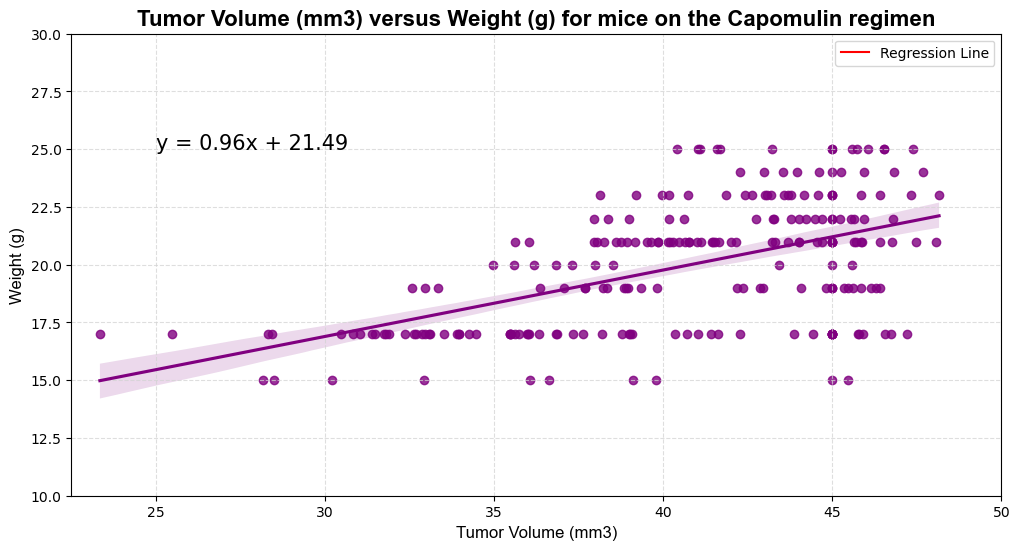

In [57]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.regplot(data=df6, x="Tumor Volume (mm3)", y="Weight (g)", x_ci='ci', scatter=True, fit_reg=True, ci=95, color="purple")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.ylabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume (mm3) versus Weight (g) for mice on the Capomulin regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.xlim(22.5, 50)
plt.ylim(10, 30)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Plot the regression line
plt.plot(x_values, regress_values, "r-", label='Regression Line')

# Annotate the regression equation
plt.annotate(line_eq, (25, 25), fontsize=15, color="black")

# Show the legend
plt.legend()

# Show/Save the Graph
plt.show()